<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Поиск-и-исправление-ошибок-в-данных" data-toc-modified-id="Поиск-и-исправление-ошибок-в-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Поиск и исправление ошибок в данных</a></span></li><li><span><a href="#Количество-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам-для-каждого-пользователя" data-toc-modified-id="Количество-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам-для-каждого-пользователя-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя</a></span></li><li><span><a href="#Количество-отправленных-сообщений-по-месяцам-для-каждого-пользователя" data-toc-modified-id="Количество-отправленных-сообщений-по-месяцам-для-каждого-пользователя-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Количество отправленных сообщений по месяцам для каждого пользователя</a></span></li><li><span><a href="#Объем-израсходованного-интернет-трафика-по-месяцам-для-каждого-пользователя" data-toc-modified-id="Объем-израсходованного-интернет-трафика-по-месяцам-для-каждого-пользователя-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Объем израсходованного интернет-трафика по месяцам для каждого пользователя</a></span></li><li><span><a href="#Помесячная-выручка-с-каждого-пользователя" data-toc-modified-id="Помесячная-выручка-с-каждого-пользователя-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Помесячная выручка с каждого пользователя</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различается" data-toc-modified-id="Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различается-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается</a></span></li><li><span><a href="#Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов" data-toc-modified-id="Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Основная цель проекта** - определить тариф, приносящий больше всего прибыли для организации.

## Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from IPython.display import display
from functools import reduce
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_calls = pd.read_csv('datasets/telecom/calls.csv')
df_calls.name = 'df_calls'

df_internet = pd.read_csv('datasets/telecom/internet.csv')
df_internet.name = 'df_internet'

df_messages = pd.read_csv('datasets/telecom/messages.csv')
df_messages.name = 'df_messages'

df_tariffs = pd.read_csv('datasets/telecom/tariffs.csv')
df_tariffs.name = 'df_tariffs'

df_users = pd.read_csv('datasets/telecom/users.csv')
df_users.name = 'df_users'

sns.set_style("darkgrid")

Функция для первичной обработки всех dataframe

In [3]:
df_list = [df_calls, df_internet, df_messages, df_tariffs, df_users]

def get_round_all_df(func):
    for df in df_list:
        print('Таблица -', df.name)
        
        if func == 'head':
            display(df.head(5))
        
        elif func == 'info':
            df.info()
            
        elif func == 'isna':
            print(df.isna().any())
            
        else:
            print('Неизвестная функция')
        
        print('--------------------------------------------------------------')
        print()

In [4]:
get_round_all_df('head')

Таблица - df_calls


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


--------------------------------------------------------------

Таблица - df_internet


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


--------------------------------------------------------------

Таблица - df_messages


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


--------------------------------------------------------------

Таблица - df_tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


--------------------------------------------------------------

Таблица - df_users


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


--------------------------------------------------------------



In [5]:
get_round_all_df('info')

Таблица - df_calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
--------------------------------------------------------------

Таблица - df_internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ 

In [6]:
get_round_all_df('isna')

Таблица - df_calls
id           False
call_date    False
duration     False
user_id      False
dtype: bool
--------------------------------------------------------------

Таблица - df_internet
Unnamed: 0      False
id              False
mb_used         False
session_date    False
user_id         False
dtype: bool
--------------------------------------------------------------

Таблица - df_messages
id              False
message_date    False
user_id         False
dtype: bool
--------------------------------------------------------------

Таблица - df_tariffs
messages_included        False
mb_per_month_included    False
minutes_included         False
rub_monthly_fee          False
rub_per_gb               False
rub_per_message          False
rub_per_minute           False
tariff_name              False
dtype: bool
--------------------------------------------------------------

Таблица - df_users
user_id       False
age           False
churn_date     True
city          False
first_name   

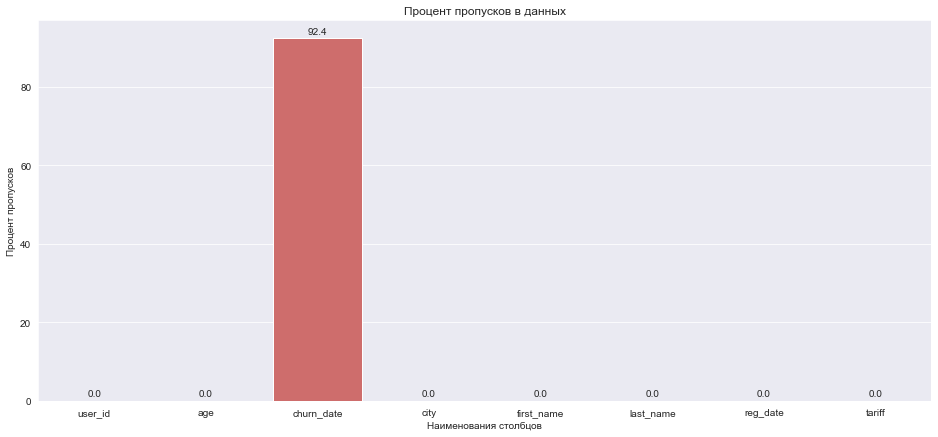

In [7]:
plt.figure(figsize=(16, 7))

nan_relation_bar = (
    sns
    .barplot(
        data = (
            df_users.isnull().sum() * 100 / len(df_users)
        ).reset_index(),
        x = 'index',
        y = 0,
        palette = "flare"
    )
)
nan_relation_bar.set(
    title = 'Процент пропусков в данных', 
    xlabel = 'Наименования столбцов', 
    ylabel = 'Процент пропусков'
)

for p in nan_relation_bar.patches:
    nan_relation_bar.annotate(
        format(p.get_height(), '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 7), 
        textcoords = 'offset points'
    )

plt.show()

**Вывод**

Таблица df_calls:
- у поля call_date нужно изменить тип данных.

Таблица df_internet
- у поля session_date нужно изменить тип данных.

Таблица df_messages
- у поля message_date нужно изменить тип данных.

Таблица df_users
- у поля churn_date нужно изменить тип данных;
- у поля reg_date нужно изменить тип данных;
- у поля churn_date больше 95% пропусков, в описании задания сказанно, если значение пропущено, то тариф ещё действовал на момент выгрузки данных

## Предобработка данных

### Замена типа данных

Функция, изменяющая тип данных у столбцов указанных в словаре

In [8]:
df_dict_type = {
    'df_calls': ['call_date'], 
    'df_internet': ['session_date'], 
    'df_messages': ['message_date'], 
    'df_users': ['churn_date', 'reg_date']
}

def replace_type_all_df(dict_type, name_type):
    for df in df_list:
        for key, value in dict_type.items():
            
            if df.name == key:
                for column_name in value:
                    if name_type == 'date':
                        df[column_name] = pd.to_datetime(df[column_name], format='%Y-%m-%d')

In [9]:
replace_type_all_df(df_dict_type, 'date')

Проверим результат

In [10]:
get_round_all_df('info')

Таблица - df_calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
--------------------------------------------------------------

Таблица - df_internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]


**Вывод**

Заменили тип данных у всех полей с датами, в остальных случаях - все в порядке.

### Поиск и исправление ошибок в данных

Посмотрим какой процент звонков имееет длительность 0.0 минут

In [11]:
print((len(df_calls[df_calls['duration'] == 0.00]) / len(df_calls)) * 100)

19.551644316336553


На наш взгляд это действительно пропущенные звонки. Заменять их каким то другим значение точно не нужно. Избавляться от них тоже не имеет смысла.

В таблице df_internet есть столбец unnamed: 0. Он полностью дублирует индекс. Удалим этот столбец

In [12]:
df_internet.drop('Unnamed: 0', axis=1, inplace=True)

**Вывод**

На наш взгляд в предоставленных датасетах отсутствуют критические ошибки. А те которые есть, мы исправили выше.

### Количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя

Добавим в df_calls столбец с названием месяца

In [13]:
df_calls['month'] = df_calls['call_date'].dt.month_name()

Заранее округлим в большую сторону значение duration для дальнейших расчетов

In [14]:
df_calls['duration_round'] = np.ceil(df_calls['duration'])

Создадим функцию для генерации сводной таблицы 

In [15]:
def group_df(df_name, list_index, value, agfunc):
    grouped_df = df_name.pivot_table(
        index=list_index,
        values=value,
        aggfunc=agfunc
    ).reset_index()
    
    return grouped_df

In [16]:
df_calls_pivot = group_df(df_calls, ['user_id', 'month'], 'duration_round', ('count', 'sum'))

Проверяем результат

In [17]:
display(df_calls_pivot.head(10))

,user_id,month,count,sum
0,1000,August,52,408.0
1,1000,December,46,333.0
2,1000,July,47,340.0
3,1000,June,43,172.0
4,1000,May,22,159.0
5,1000,November,43,338.0
6,1000,October,57,350.0
7,1000,September,58,466.0
8,1001,December,63,414.0
9,1001,November,59,430.0


###  Количество отправленных сообщений по месяцам для каждого пользователя

Добавим в df_messages столбец с названием месяца

In [18]:
df_messages['month'] = df_messages['message_date'].dt.month_name()

In [19]:
df_messages_pivot = group_df(df_messages, ['user_id', 'month'], 'id', 'count')

Проверяем результат

In [20]:
display(df_messages_pivot.head(10))

,user_id,month,id
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22
5,1000,November,58
6,1000,October,73
7,1000,September,57
8,1002,August,13
9,1002,December,12


### Объем израсходованного интернет-трафика по месяцам для каждого пользователя

Добавим в df_internet столбец с названием месяца

In [21]:
df_internet['month'] = df_internet['session_date'].dt.month_name()

Заранее округлим в большую сторону значение mb_used для дальнейших расчетов

In [22]:
df_internet['mb_used_round'] = np.ceil(df_internet['mb_used'])

In [23]:
df_internet_pivot = group_df(df_internet, ['user_id', 'month'], 'mb_used_round', 'sum')

Переведем мегабайты в гигабайты и округлим вверх

In [24]:
df_internet_pivot['gb_used_round'] = np.ceil(df_internet_pivot['mb_used_round'] / 1024)

Удалим столбец с мегабайтами из сводной таблицы

In [25]:
df_internet_pivot.drop('mb_used_round', axis=1, inplace=True)

Проверяем результат

In [26]:
display(df_internet_pivot.head(10))

,user_id,month,gb_used_round
0,1000,August,14.0
1,1000,December,10.0
2,1000,July,14.0
3,1000,June,23.0
4,1000,May,3.0
5,1000,November,15.0
6,1000,October,15.0
7,1000,September,15.0
8,1001,December,14.0
9,1001,November,19.0


### Помесячная выручка с каждого пользователя

Для расчета ежемесячной выручки по каждому пользователю, нужно объединить все сводные таблицы.

In [27]:
# создаем массив из таблиц для объединения
dfs = [df_calls_pivot, df_messages_pivot, df_internet_pivot]

df_pivot = reduce(lambda left,right: pd.merge(left,right, how='outer', on=['user_id', 'month']), dfs)

In [28]:
# переименуем столбцы 
df_pivot.rename({'count': 'calls', 'sum': 'durations', 'id': 'messages', 'gb_used_round': 'gb_used'}, axis=1, inplace=True)

# заменим все NaN на 0 
df_pivot.fillna(0, inplace=True)

Добавим к нашей таблице, название тарифа и город

In [29]:
df_pivot = pd.merge(
    df_pivot, df_users[['user_id', 'tariff', 'city']], 
    how='left', 
    on='user_id'
)

# добавим все стобцы из таблицы df_tariffs к нашей сводной таблице
df_pivot = pd.merge(
    df_pivot, df_tariffs,
    how='left', 
    left_on='tariff', 
    right_on='tariff_name'
)
# удалим дубликат столбца с тарифом
df_pivot.drop('tariff_name', axis=1, inplace=True)

Переведем включенные в тариф мегабайты в гигабайты

In [30]:
df_pivot['gb_per_month_included'] = df_pivot['mb_per_month_included'] / 1024

# удалим столбец с мегабайтами
df_pivot.drop('mb_per_month_included', axis=1, inplace=True)

Создадим функцию для расчета ежемесячных затрат для каждого пользователя

In [31]:
# вложенная функция
def cost_condition(value, value_included, penalty):
    if value > value_included:
        return (value - value_included) * penalty
    
    else:
        return 0

def calculate_cost(row):  
    # создадим словарь для обхода циклом 
    value_dict = {
        'duration': [row['durations'], row['minutes_included'], row['rub_per_minute']],
        'messages': [row['messages'], row['messages_included'], row['rub_per_message']],
        'gb_used': [row['gb_used'], row['gb_per_month_included'], row['rub_per_gb']]
    }
    total = 0

    # проходим циклом по словарю и расчитываем затраны сверх тарифных лимитов 
    for key, value in value_dict.items():
        val = cost_condition(value[0], value[1], value[2])
        
        total = val + total
        
    # если пользователь не превысил включенные в тариф лимиты, выводим только ежемесячную стоимость
    if total == 0:
        return row['rub_monthly_fee']
    
    # если пользователь превысил включенные в тариф лимиты, выводим ежемесячную 
    # стоимость и то что нужно оплатить сверх тарифа 
    else:
        return total + row['rub_monthly_fee']

Вызываем функцию и передаем в нее необходимые значения

In [32]:
df_pivot['payment'] = df_pivot.apply(calculate_cost, axis=1)

Выведем графики и подведем итоги

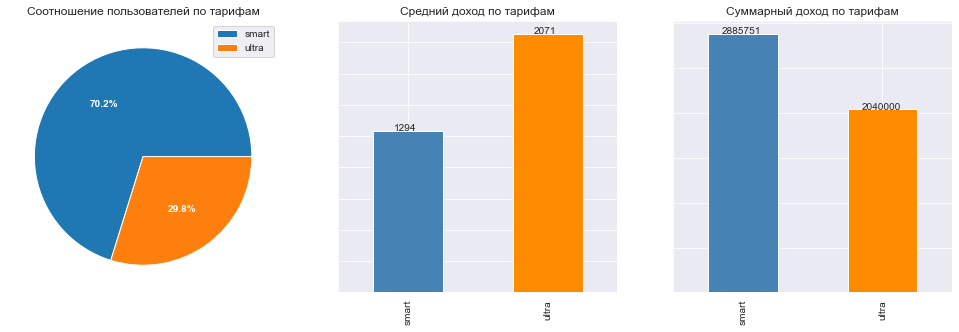

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

tariff_pie = df_users.groupby('tariff')['user_id'].count().plot(
    kind='pie',
    y='count', 
    autopct="%.1f%%",
    textprops={'color':'w', 'weight':'bold'},
    title='Соотношение пользователей по тарифам',
    legend=True,
    ax=axes[0]
)
tariff_pie.set_ylabel('')

tariff_mean_bar = df_pivot.groupby('tariff')['payment'].mean().plot(
    x='tariff',
    y='payment', 
    kind='bar',
    title='Средний доход по тарифам',
    color=['steelblue', 'darkorange'],
    ax=axes[1]
)
tariff_mean_bar.set_xlabel('')
tariff_mean_bar.set_yticklabels([])

# выводим значения столбцов на график
for p in tariff_mean_bar.patches:
    tariff_mean_bar.annotate(int(p.get_height()), (p.get_x() + 0.15, p.get_height()))


tariff_sum_bar = df_pivot.groupby('tariff')['payment'].sum().plot(
    x='tariff',
    y='payment', 
    kind='bar',
    title='Суммарный доход по тарифам',
    color=['steelblue', 'darkorange'],
    ax=axes[2]
)
tariff_sum_bar.set_xlabel('')
tariff_sum_bar.set_yticklabels([])

# выводим значения столбцов на график
for p in tariff_sum_bar.patches:
    tariff_sum_bar.annotate(int(p.get_height()), (p.get_x() + 0.1, p.get_height()))

    
plt.show()

Сделаем разбивку по городам на 2 категории: Москва и другие.

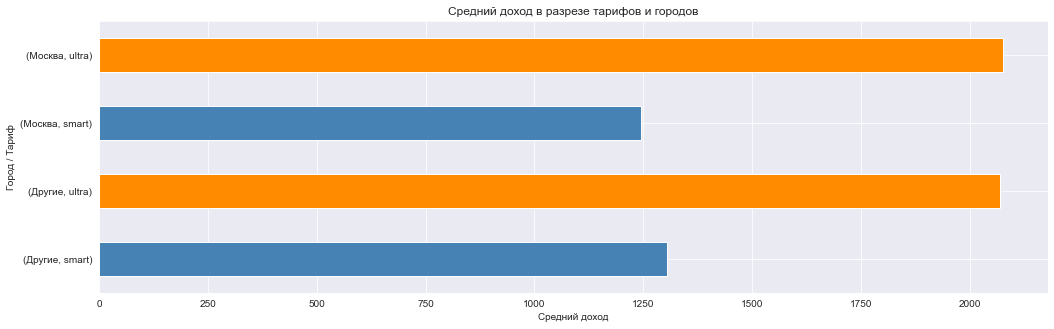

In [34]:
df_pivot['city_cat'] = df_pivot['city'].where(
    df_pivot['city'] == "Москва", "Другие"
)

# выведем средний доход в разрезе города и тарифа
qwer = df_pivot.groupby(['city_cat', 'tariff'])['payment'].mean().plot(
    kind='barh',
    x='city_cat',
    y='payment',
    figsize=(17, 5),
    color=['steelblue', 'darkorange'],
    title='Средний доход в разрезе тарифов и городов'
)
qwer.set_xlabel('Средний доход')
qwer.set_ylabel('Город / Тариф')

plt.show()

**Вывод**

Нам удалось составить единую сводную таблицу по всем данным, и сгруппировать их по пользователям и месяцам. Так же мы расчитали платежи и переплаты для каждого пользователя, что бы в дальнейшем аппелировать этими данными при анализе. 

На текущем этапе нам известно следующее - средний платеж по тарифу Smart, с учетом всех переплат за израсходованные лимиты, ниже чем у тарифа Ultra. Но пользователей у Smart в два раза больше, и прибыль соотвественно выше.

Средний доход по Москве и остальным городам почти одинаковый

## Анализ данных

Создадим отдельный датафрейм без лишней информации по тарифам

In [35]:
df_pivot_short = df_pivot[['user_id', 'month', 'calls', 'durations', 'messages', 'gb_used', 'tariff']]

Создадим функцию для вывода диаграмм размаха в сравнении по тарифам

In [36]:
def create_plot(column, plot_type):    
    if plot_type == 'box':
        df_pivot_short.query('tariff == "smart"').plot(
            y=column,
            kind='box',
            ylim=(-5, max(df_pivot_short.query('tariff == "ultra"')[column])+10),
            legend=False,
            grid=True,
            ax=axes[0]
        )
        axes[0].set_title('Тариф smart')

        df_pivot_short.query('tariff == "ultra"').plot(
            y=column,
            kind='box',
            ylim=(-5, max(df_pivot_short.query('tariff == "ultra"')[column])+10),
            legend=False,
            grid=True,
            ax=axes[1]
        )
        axes[1].set_title('Тариф ultra')
        
    elif plot_type == 'distr':
        sns.distplot(
            df_pivot_short.query('tariff == "smart"')[column], 
            fit=norm, 
            kde=False,
            ax=axes[0]

        ).get_figure()
        axes[0].set_title('Тариф smart')


        sns.distplot(
            df_pivot_short.query('tariff == "ultra"')[column], 
            fit=norm, 
            kde=False,
            ax=axes[1],

        ).get_figure()
        axes[1].set_title('Тариф ultra')

Кол-во потраченных минут на диаграмме размаха по тарифам:


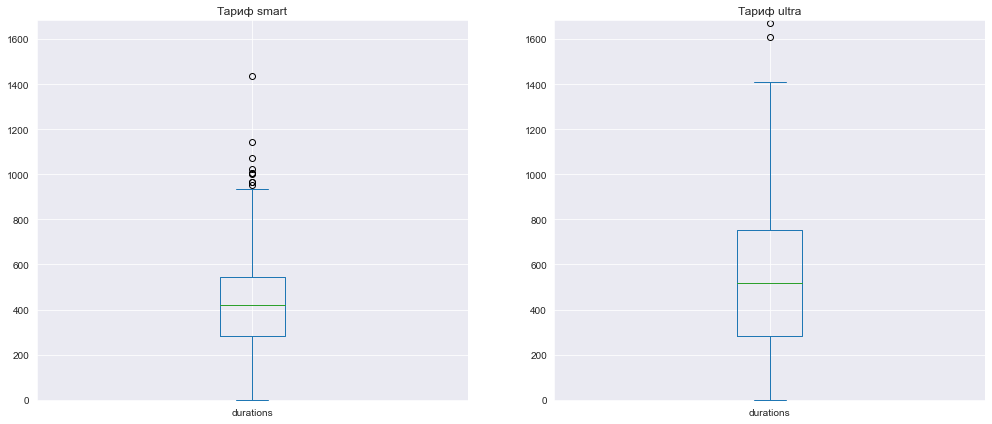

Кол-во отправленных сообщений на диаграмме размаха по тарифам:


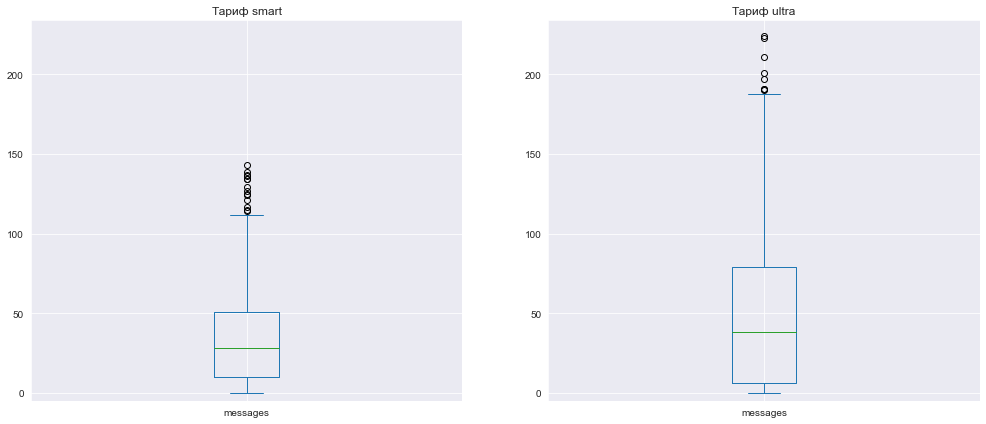

Кол-во потраченных Gb трафика на диаграмме размаха по тарифам:


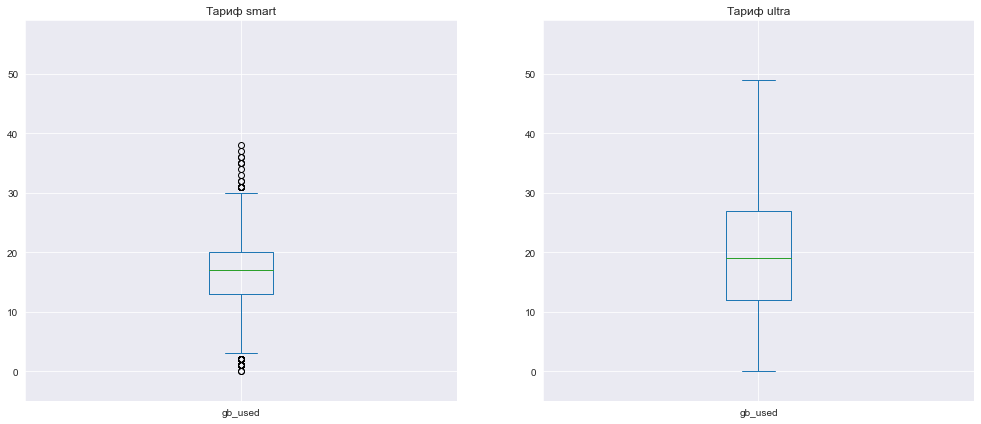

In [37]:
# словарь столбцов для оценки на диаграмме размаха
plot_list = {
    'durations': ['Кол-во потраченных минут на диаграмме размаха по тарифам:', 'Кол-во потраченных минут на гистограмме распределения по тарифам:'],
    'messages': ['Кол-во отправленных сообщений на диаграмме размаха по тарифам:', 'Кол-во отправленных сообщений на гистограмме распределения по тарифам:'],
    'gb_used': ['Кол-во потраченных Gb трафика на диаграмме размаха по тарифам:', 'Кол-во потраченных Gb трафика на гистограмме распределения по тарифам:']
}



# цикл по словарю
for key, value in plot_list.items():
    fig, axes = plt.subplots(1, 2, figsize=(17, 7))
    print(value[0])
    plot_box = create_plot(key, 'box')
    plt.show()


Посмотрим более точно на средние значения

In [38]:
analysis_pivot = df_pivot_short.pivot_table(
    index='tariff', 
    values=['durations', 'messages', 'gb_used'], 
    aggfunc='mean'
).reset_index()

display(analysis_pivot)

,tariff,durations,gb_used,messages
0,smart,417.934948,16.359354,33.384029
1,ultra,526.623350,19.525888,49.363452


В целом видно, на тарифе Smart больше выбросов чем на Ultra.
По отправленным сообщения среднее значение не стремится к длинному хвосту высоких значений в обоих случаях. Значит выбросы по этому параметру давольно редкое явление в нашем датасете.

На тарифе Smart в среднем пользователи тратят:
- 418 минут на общение
- 33 сообщения
- 16Gb интернет трафика

На тарифе Ultra в среднем пользователи тратят:
- 527 минут на общение
- 49 сообщений
- 20Gb интернет трафика

Наш датасет не генеральная совокупность, а выборка из какой-то большей совокупности. Примем это во внимание при расчете дисперсии

In [39]:
def calculate_variance(tariff_name, column, column_name, operation):
    if operation == 'variance':
        analysis_pivot.loc[analysis_pivot['tariff'] == tariff_name, column_name] = np.var(df_pivot_short.query('tariff == @tariff_name')[column], ddof=1)
        
    elif operation == 'std':
        analysis_pivot.loc[analysis_pivot['tariff'] == tariff_name, column_name] = np.sqrt(analysis_pivot.query('tariff == @tariff_name')[column])

In [40]:
tariff_list = ['smart', 'ultra']
variance_list = {
    'durations': 'variance_durations',
    'gb_used': 'variance_gb_used',
    'messages': 'variance_messages'
}

for tariff in tariff_list:
    for key, value in variance_list.items():
        calculate_variance(tariff, key, value, 'variance')
        
        
display(analysis_pivot)

,tariff,durations,gb_used,messages,variance_durations,variance_gb_used,variance_messages
0,smart,417.934948,16.359354,33.384029,36219.315784,33.160304,796.812958
1,ultra,526.623350,19.525888,49.363452,100873.633397,97.334949,2285.266143


Корень из дисперсии равен стандартному отклонению. Вычислим стандартное отклонение по этому правилу.

Допишем нашу функцию std_list() для расчета стандартного отклонения

In [41]:
std_list = {
    'variance_durations': 'std_durations',
    'variance_gb_used': 'std_gb_used',
    'variance_messages': 'std_messages'
}

for tariff in tariff_list:
    for key, value in std_list.items():
        calculate_variance(tariff, key, value, 'std')
        
        
display(analysis_pivot)

,tariff,durations,gb_used,messages,variance_durations,variance_gb_used,variance_messages,std_durations,std_gb_used,std_messages
0,smart,417.934948,16.359354,33.384029,36219.315784,33.160304,796.812958,190.313730,5.758498,28.227876
1,ultra,526.623350,19.525888,49.363452,100873.633397,97.334949,2285.266143,317.606098,9.865848,47.804457


Построим гистограммы распределения с разбивкой по тарифу. Для этого доработаем нашу функцию create_plot() и словарь plot_list

Кол-во потраченных минут на гистограмме распределения по тарифам:


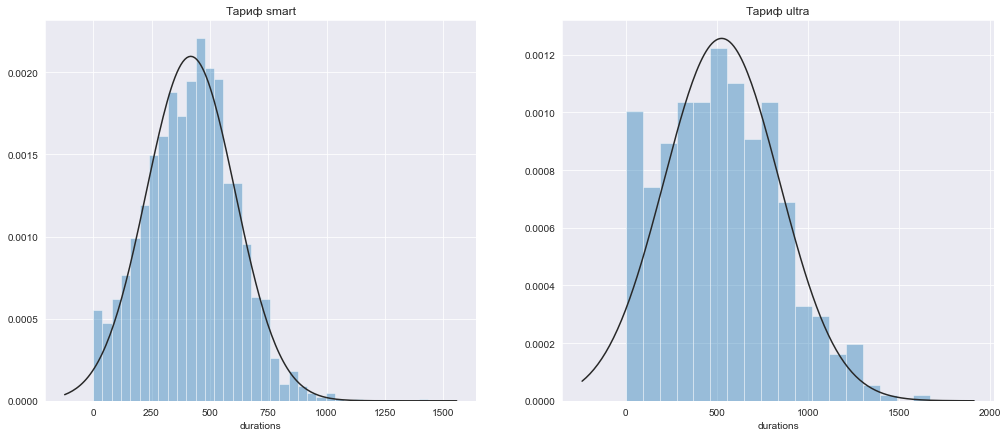

Кол-во отправленных сообщений на гистограмме распределения по тарифам:


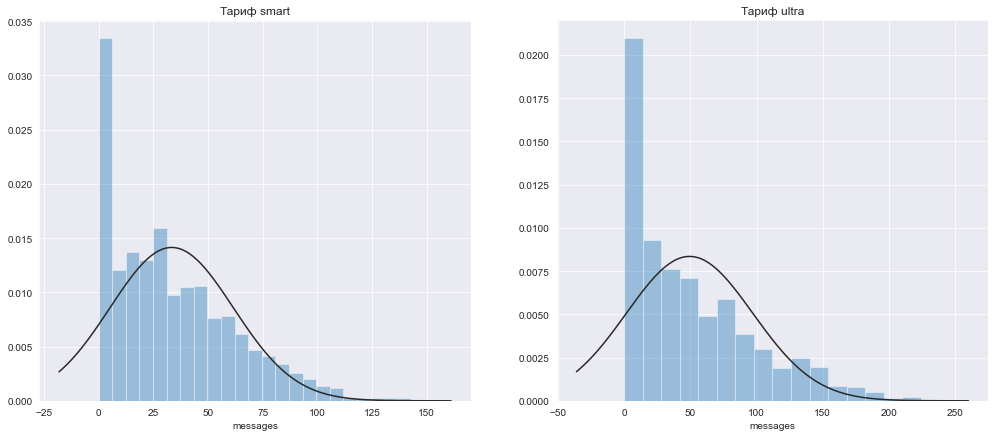

Кол-во потраченных Gb трафика на гистограмме распределения по тарифам:


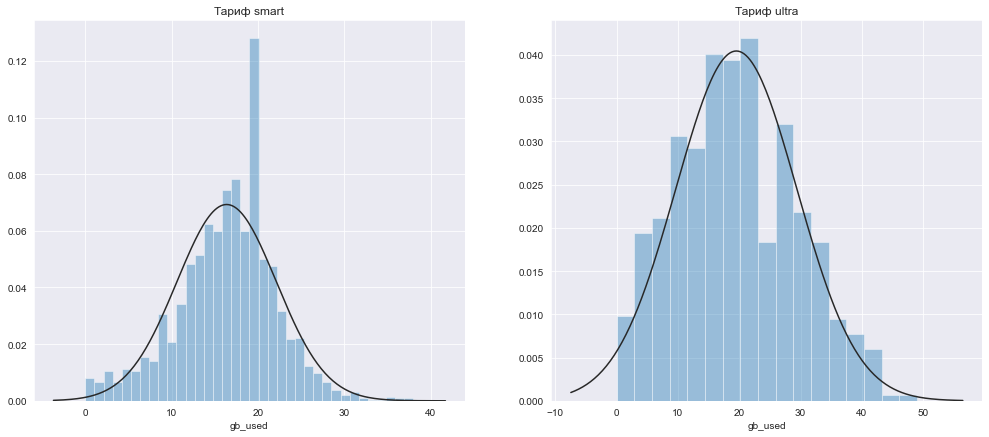

In [42]:
# цикл по словарю
for key, value in plot_list.items():
    fig, axes = plt.subplots(1, 2, figsize=(17, 7))
    print(value[1])
    create_plot(key, 'distr')
    plt.show()

**Вывод**

- распределение затраченных минут в smart более равномерное чем в тарифе ultra и похоже на распределение Пуассона;
- распределение по сообщениям похоже на биноминальное и имеет общую структуру в двух тарифах. По графику видно что большинство пользователей не пользуется сообщениями вообще, либо в малых количествах, 21 век...;
- относительно интернет-трафика, у тарифа смарт распределение похоже на нормальное. В ультре больше на распределение Пуассона 

## Проверка гипотез

Для проверки первой и второй гипотез, нам нужно разбить наш датасет на две части (два тарифа). По факту мы получаем две генеральные совокупности по которым сопоставим среднее.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод **st.ttest_ind()**
**equal_var** зададим значение **False**, так как дисперсии генеральных совокупностей различаются.

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Нулевая гипотеза: средняя выручка по тарифу смарт и ультра равна

Алтернативная гипотеза: средняя выручка по тарифу смарт и ультра различается

In [43]:
sample_smart = df_pivot.query('tariff == "smart"')['payment']
sample_ultra = df_pivot.query('tariff == "ultra"')['payment']

alpha = 0.05

results = st.ttest_ind(sample_smart, sample_ultra, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу


### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулевая гипотеза: средняя выручка по Москве и остальным городам равна

Алтернативная гипотеза: средняя выручка по Москве и остальным городам различается

In [44]:
sample_moscow = df_pivot.query('city == "Москва"')['payment']
sample_other = df_pivot.query('city != "Москва"')['payment']

alpha = 0.05

results = st.ttest_ind(sample_moscow, sample_other, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5126564657748214
Не получилось отвергнуть нулевую гипотезу


**Вывод**

- средняя выручка пользователей тарифов «Ультра» и «Смарт» **различается**;
- средняя выручка пользователей из Москвы **не отличается** от выручки пользователей из других регионов.

## Общий вывод

Подводя итоги, можно дать следующие рекомендации для корректировки рекламного бюджета компании.
Тариф Smart имеет большую аудиторию, и пользователи на этом тарифе чаще выходят за пределы ежемесячных лимитов. Соответственно данный тариф приносит больше денег чем Ultra.
Итог - выделять больше денег на рекламу тарифа Smart по всей России.